In [1]:
from networks import *

In [2]:
features = ['r']
target = ['r']
window = 24
forward_length = 2

reader = PriceReader()
val = reader(['BERRIES'], [2])
val_set = Unsupervised(val, window, features, forward_length)
vl = DataLoader(val_set, batch_size=len(val_set), num_workers=16, shuffle=False)

In [3]:
model = NetTrader.load_from_checkpoint('checkpoints/epoch=4-step=3125.ckpt')

In [4]:
out = model(next(iter(vl))[0])

In [5]:
out = out.detach().numpy()

In [7]:
val['strat'] = [0] * 10000
val['strat'][:9974]  = val['r'].shift(-1)[:9974] * out[:, 0]
val['strat'] += 1
val['strat'] = val['strat'].cumprod()

C:\Users\fu306\AppData\Local\Temp\ipykernel_27564\3539463797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['strat'][:9974]  = val['r'].shift(-1)[:9974] * out[:, 0]


<Axes: xlabel='timestamp'>

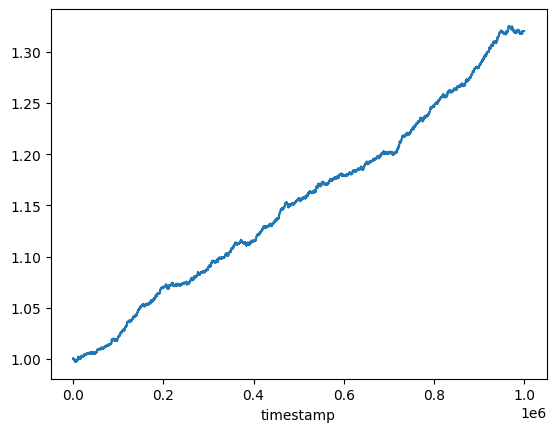

In [8]:
val['strat'].plot()

In [9]:
import pyperclip
print(model.state_dict().keys())

odict_keys(['model.to_hidden.weight', 'model.to_hidden.bias', 'model.hidden.0.weight', 'model.hidden.0.bias', 'model.to_out.weight', 'model.to_out.bias'])


In [25]:
i = 0

In [27]:
layer = list(model.state_dict().keys())[i]
pyperclip.copy(str(model.state_dict()[layer].numpy().astype(np.float16).tobytes()))
print(model.state_dict()[layer].numpy().shape)
i += 1

(40,)
